<a href="https://colab.research.google.com/github/asepmuhidin/MK-Data-Mining-UPB/blob/main/outlier_c6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("https://raw.githubusercontent.com/asepmuhidin/MK-Data-Mining-UPB/main/dataset/SOCR-HeightWeight.csv")
df.head()

,Index,Height(Inches),Weight(Pounds)
0,1,65.78331,112.9925
1,2,71.51521,136.4873
2,3,69.39874,153.0269
3,4,68.21660,142.3354
4,5,67.78781,144.2971


In [4]:
df.drop(columns=['Index'], inplace=True)
df.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [5]:
df['tinggi']=df['Height(Inches)'].apply(lambda x:x*2.54)
df['berat']=df['Weight(Pounds)'].apply(lambda x:x*0.453592)
df.head()

,Height(Inches),Weight(Pounds),tinggi,berat
0,65.78331,112.9925,167.089607,51.252494
1,71.51521,136.4873,181.648633,61.909547
2,69.39874,153.0269,176.272800,69.411778
3,68.21660,142.3354,173.270164,64.562199
4,67.78781,144.2971,172.181037,65.452010


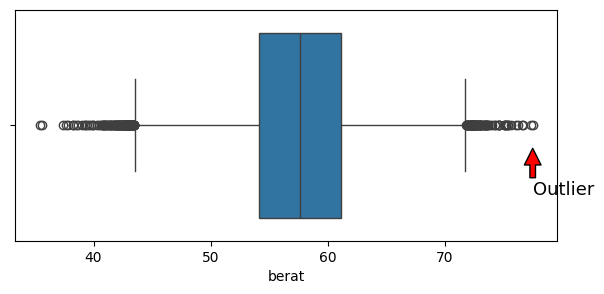

In [6]:
#Boxplot data Berat
plt.figure(figsize=(7,3))
sns.boxplot(df.berat, orient='h')
plt.annotate("Outlier",(df.berat.max(),0.1),xytext=(df.berat.max(),0.3)
,arrowprops=dict(facecolor='red'),fontsize=13);

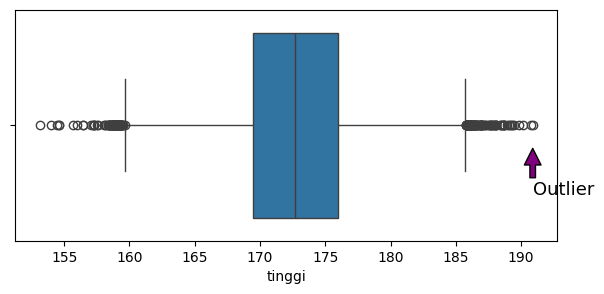

In [10]:
# Tugas 1: Buat boxplot data tinggi
plt.figure(figsize=(7,3))
sns.boxplot(df.tinggi, orient='h')
plt.annotate("Outlier",(df.tinggi.max(),0.1),xytext=(df.tinggi.max(),0.3),arrowprops=dict(facecolor='purple'),fontsize=13);

In [8]:
df.describe()

,Height(Inches),Weight(Pounds),tinggi,berat
count,25000.000000,25000.000000,25000.000000,25000.000000
mean,67.993114,127.079421,172.702509,57.642209
std,1.901679,11.660898,4.830264,5.289290
min,60.278360,78.014760,153.107034,35.386871
25%,66.704397,119.308675,169.429170,54.117461
50%,67.995700,127.157750,172.709078,57.677738
75%,69.272958,134.892850,175.953312,61.186318
max,75.152800,170.924000,190.888112,77.529759


In [7]:
#Menentukan batas atas dan bawah data berat
q1_berat=df.berat.describe()['25%']
q2_berat=df.berat.describe()['50%']
q3_berat=df.berat.describe()['75%']
iqr_berat=q3_berat-q1_berat
batas_bawah_berat=q1_berat-(1.5*iqr_berat)
batas_atas_berat=q3_berat+(1.5*iqr_berat)
print(f"Q1 berat={q1_berat}")
print(f"Q2 berat={q2_berat}")
print(f"Q3 berat={q3_berat}")
print(f"IQR berat={iqr_berat}")
print(f"batas bawah berat={batas_bawah_berat}")
print(f"batas atas berat={batas_atas_berat}")

Q1 berat=54.1174605106
Q2 berat=57.677738138
Q3 berat=61.186317617200004
IQR berat=7.0688571066000065
batas bawah berat=43.51417485069999
batas atas berat=71.78960327710001


In [11]:
#Tugas 2 : Menentukan batas atas dan bawah data Tinggi
q1_tinggi = df.tinggi.describe()['25%']
q3_tinggi = df.tinggi.describe()['75%']
iqr_tinggi = q3_tinggi - q1_tinggi
batas_bawah_tinggi = q1_tinggi - (1.5 * iqr_tinggi)
batas_atas_tinggi = q3_tinggi + (1.5 * iqr_tinggi)
print(f"Q1 tinggi={q1_tinggi}")
print(f"Q3 tinggi={q3_tinggi}")
print(f"IQR tinggi={iqr_tinggi}")
print(f"batas bawah tinggi={batas_bawah_tinggi}")
print(f"batas atas tinggi={batas_atas_tinggi}")

Q1 tinggi=169.42916965
Q3 tinggi=175.95331205
IQR tinggi=6.524142399999988
batas bawah tinggi=159.64295605
batas atas tinggi=185.73952564999996


<Axes: xlabel='berat'>

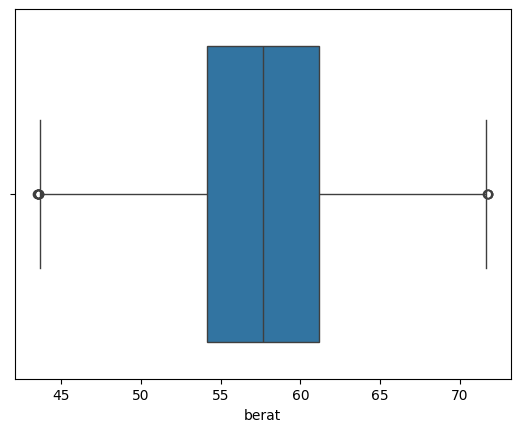

In [15]:
#Memfilter data oulier berat berdasarkan batas atas dan bawah
df_n=df[(df.berat>=batas_bawah_berat) & (df.berat<=batas_atas_berat)].copy()
sns.boxplot(df_n.berat, orient='h')

<Axes: >

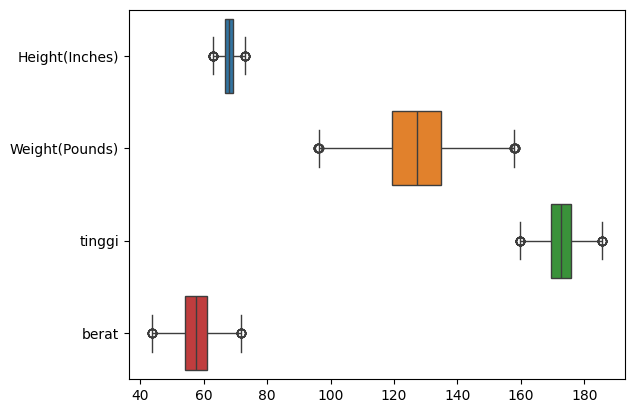

In [17]:
#Tugas 3 : Memfilter data oulier tinggi berdasarkan batas atas dan bawah
df_n=df_n[(df_n.tinggi>=batas_bawah_tinggi) & (df_n.tinggi<=batas_atas_tinggi)].copy()
sns.boxplot(df_n,orient='h')

In [18]:
def minmax(x,x_min,x_max):
  return (x-x_min)/(x_max-x_min)
def standarisasi(x,mean,std):
  return (x-mean)/std

In [19]:
min=df_n.tinggi.min()
max=df_n.tinggi.max()
df_n['tinggi_scl']=df_n.apply(lambda x: minmax(x['tinggi'],min,max), axis=1)

min_berat=df_n.berat.min()
max_berat=df_n.berat.max()
df_n['berat_scl']=df_n.apply(lambda x: minmax(x['berat'],min_berat,max_berat),axis=1)
df_n.head()

,Height(Inches),Weight(Pounds),tinggi,berat,tinggi_scl,berat_scl
0,65.78331,112.9925,167.089607,51.252494,0.285435,0.273498
1,71.51521,136.4873,181.648633,61.909547,0.844162,0.650634
2,69.39874,153.0269,176.272800,69.411778,0.637855,0.916126
3,68.21660,142.3354,173.270164,64.562199,0.522624,0.744507
4,67.78781,144.2971,172.181037,65.452010,0.480827,0.775996


In [ ]:
#Tugas 4 : Gunakan teknik standarisasi untuk scaling disimpan dalam kolom tinggi_std dan berat_std


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

In [22]:
X=df_n.iloc[:,[4]].values
y=df_n.iloc[:,[5]].values

In [23]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [24]:
regresi=LinearRegression()
regresi.fit(x_train,y_train)
predict=regresi.predict(x_test)

In [25]:
mae=mean_absolute_error(y_test,predict)
r2=r2_score(y_test,predict)
print(f"MAE : {mae}, R2 : {r2}")

MAE : 0.12582585893507328, R2 : 0.24523624987347037
